In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans 
from Get_Stocks import StockFilterParticular, StockFilter

stock_filter= StockFilter()
stock_filter_particular = StockFilterParticular()

In [7]:
# universe = ["MMM","ACN","ATVI","ADBE","ADP","ABNB","BABA","GOOGL","GOOGL","AMZN","AMD","AXP","AMGN",
# "AAPL","AMAT","T","TEAM","BIDU","BAC","BRK-A","BYND","BLK","SQ","BA","BKNG","AVGO","CAT","SCHW",
# "CHTR","CVX","CSCO","C","KO","COIN","CMCSA","COST","CVS","DOCU","DASH","^DJI","EBAY","EA","XOM","F",
# "GE","GM","GILD","GS","HD","HON","IBM","INTC","INTU","ISRG","JNJ","JPM","LCID","LYFT","MA","MDT","MRK",
# "META","MU","MSFT","MS","NFLX","NKE","NIO","NVDA","ORCL","PYPL","PEP","PFE","PM","PINS","PG","QCOM","QS",
# "HOOD","ROKU","SPGI","CRM","NOW","SHOP","SNAP","SNOW","SPOT","SBUX","TGT","TSLA","TXN","TMO","TME","TM",
# "TRV","TSM","TWLO","UNP","UNH","UPS","VZ","SPCE","V","WBA","WMT","WFC"]

def down_stocks():
    universe = ["MMM","ACN","ATVI","ADBE","ADP","ABNB","BABA","GOOGL","GOOGL","AMZN","AMD","AXP","AMGN",
"AAPL","AMAT","T","TEAM","BIDU","BAC","BRK-A","BYND","BLK","SQ","BA","BKNG","AVGO","CAT","SCHW",
"CHTR","CVX","CSCO","C","KO","COIN","CMCSA","COST","CVS","DOCU","DASH","^DJI","EBAY","EA","XOM","F",
"GE","GM","GILD","GS","HD","HON","IBM","INTC","INTU","ISRG","JNJ","JPM","LCID","LYFT","MA","MDT","MRK",
"META","MU","MSFT","MS","NFLX","NKE","NIO","NVDA","ORCL","PYPL","PEP","PFE","PM","PINS","PG","QCOM","QS",
"HOOD","ROKU","SPGI","CRM","NOW","SHOP","SNAP","SNOW","SPOT","SBUX","TGT","TSLA","TXN","TMO","TME","TM",
"TRV","TSM","TWLO","UNP","UNH","UPS","VZ","SPCE","V","WBA","WMT","WFC"]
    start = '2010-01-01'
    df = yf.download(universe, start)['Adj Close']
    return df

data = down_stocks()
data, sharpe_ratios = stock_filter.filtro_sharpe(data)
data = stock_filter_particular.filtro_sector(data, sharpe_ratios)
data

[*********************100%***********************]  105 of 105 completed


,AAPL,ACN,ADBE,ADP,AMAT,AMGN,ATVI,AVGO,AXP,BIDU,...,TSLA,TSM,TXN,UNH,UNP,UPS,V,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.496295,32.708157,37.090000,27.178549,11.273009,42.488079,10.018280,13.796174,33.551670,41.002998,...,NaN,7.532079,18.492170,25.785114,24.531586,38.856686,20.016432,16.298607,40.013062,41.319061
2010-01-05,6.507527,32.910294,37.700001,27.032587,11.186296,42.120022,10.036013,13.898579,33.477886,40.590000,...,NaN,7.499557,18.385525,25.744223,24.872984,38.923473,19.787067,16.328001,39.614643,41.480392
2010-01-06,6.404015,33.260159,37.619999,26.969139,11.162646,41.803501,9.982816,14.008303,34.019032,41.250000,...,NaN,7.473541,18.250443,25.997744,24.910494,38.636288,19.521360,15.858497,39.526085,41.838928
2010-01-07,6.392176,33.229065,36.889999,26.956442,11.044395,41.420719,9.743443,13.920524,34.570774,40.463001,...,NaN,7.226373,18.307316,26.995453,24.689150,38.342422,19.703041,15.764106,39.548222,41.707455
2010-01-08,6.434674,33.096897,36.689999,26.918371,11.470092,41.788765,9.663649,14.022935,34.546074,40.426998,...,NaN,7.219869,18.726782,26.741928,25.525751,40.185749,19.757547,15.774033,39.349022,41.540134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12,183.789993,311.480011,474.630005,218.360001,140.009995,217.360001,79.769997,855.359985,173.639999,134.360001,...,249.830002,106.613457,174.039993,490.576172,198.960007,171.500000,226.169998,35.610001,154.100006,106.419998
2023-06-13,183.309998,315.160004,478.989990,220.490005,141.789993,221.990005,80.699997,851.119995,175.139999,142.570007,...,258.709991,106.354546,177.410004,489.301422,198.929993,172.889999,223.399994,35.480000,155.300003,106.440002
2023-06-14,183.949997,315.049988,479.529999,216.089996,141.169998,222.279999,81.230003,886.179993,174.470001,147.210007,...,256.790009,106.961998,177.119995,457.979980,202.740005,174.880005,223.440002,35.730000,156.869995,105.160004


In [3]:
def filtro_sharpe(data):
    
    returns_df = np.log1p(data.pct_change())
    sharpe_ratios = (returns_df.mean()*252) / (returns_df.std()* np.sqrt(252))
    return sharpe_ratios

data = filtro_sharpe(data)
data

AAPL    0.873617
ACN     0.694299
ADBE    0.603073
ADP     0.701656
AMAT    0.513757
          ...   
UPS     0.491621
V       0.702774
VZ      0.335042
WMT     0.521739
XOM     0.273314
Length: 61, dtype: float64

In [4]:
sorted_data = data.sort_values(ascending=False)[:10]
sorted_data

COST    0.903959
AAPL    0.873617
AVGO    0.870605
UNH     0.839872
HD      0.837286
SPGI    0.773519
MSFT    0.763082
MA      0.724906
INTU    0.709906
V       0.702774
dtype: float64

In [8]:
correlation_matrix = data.corr()

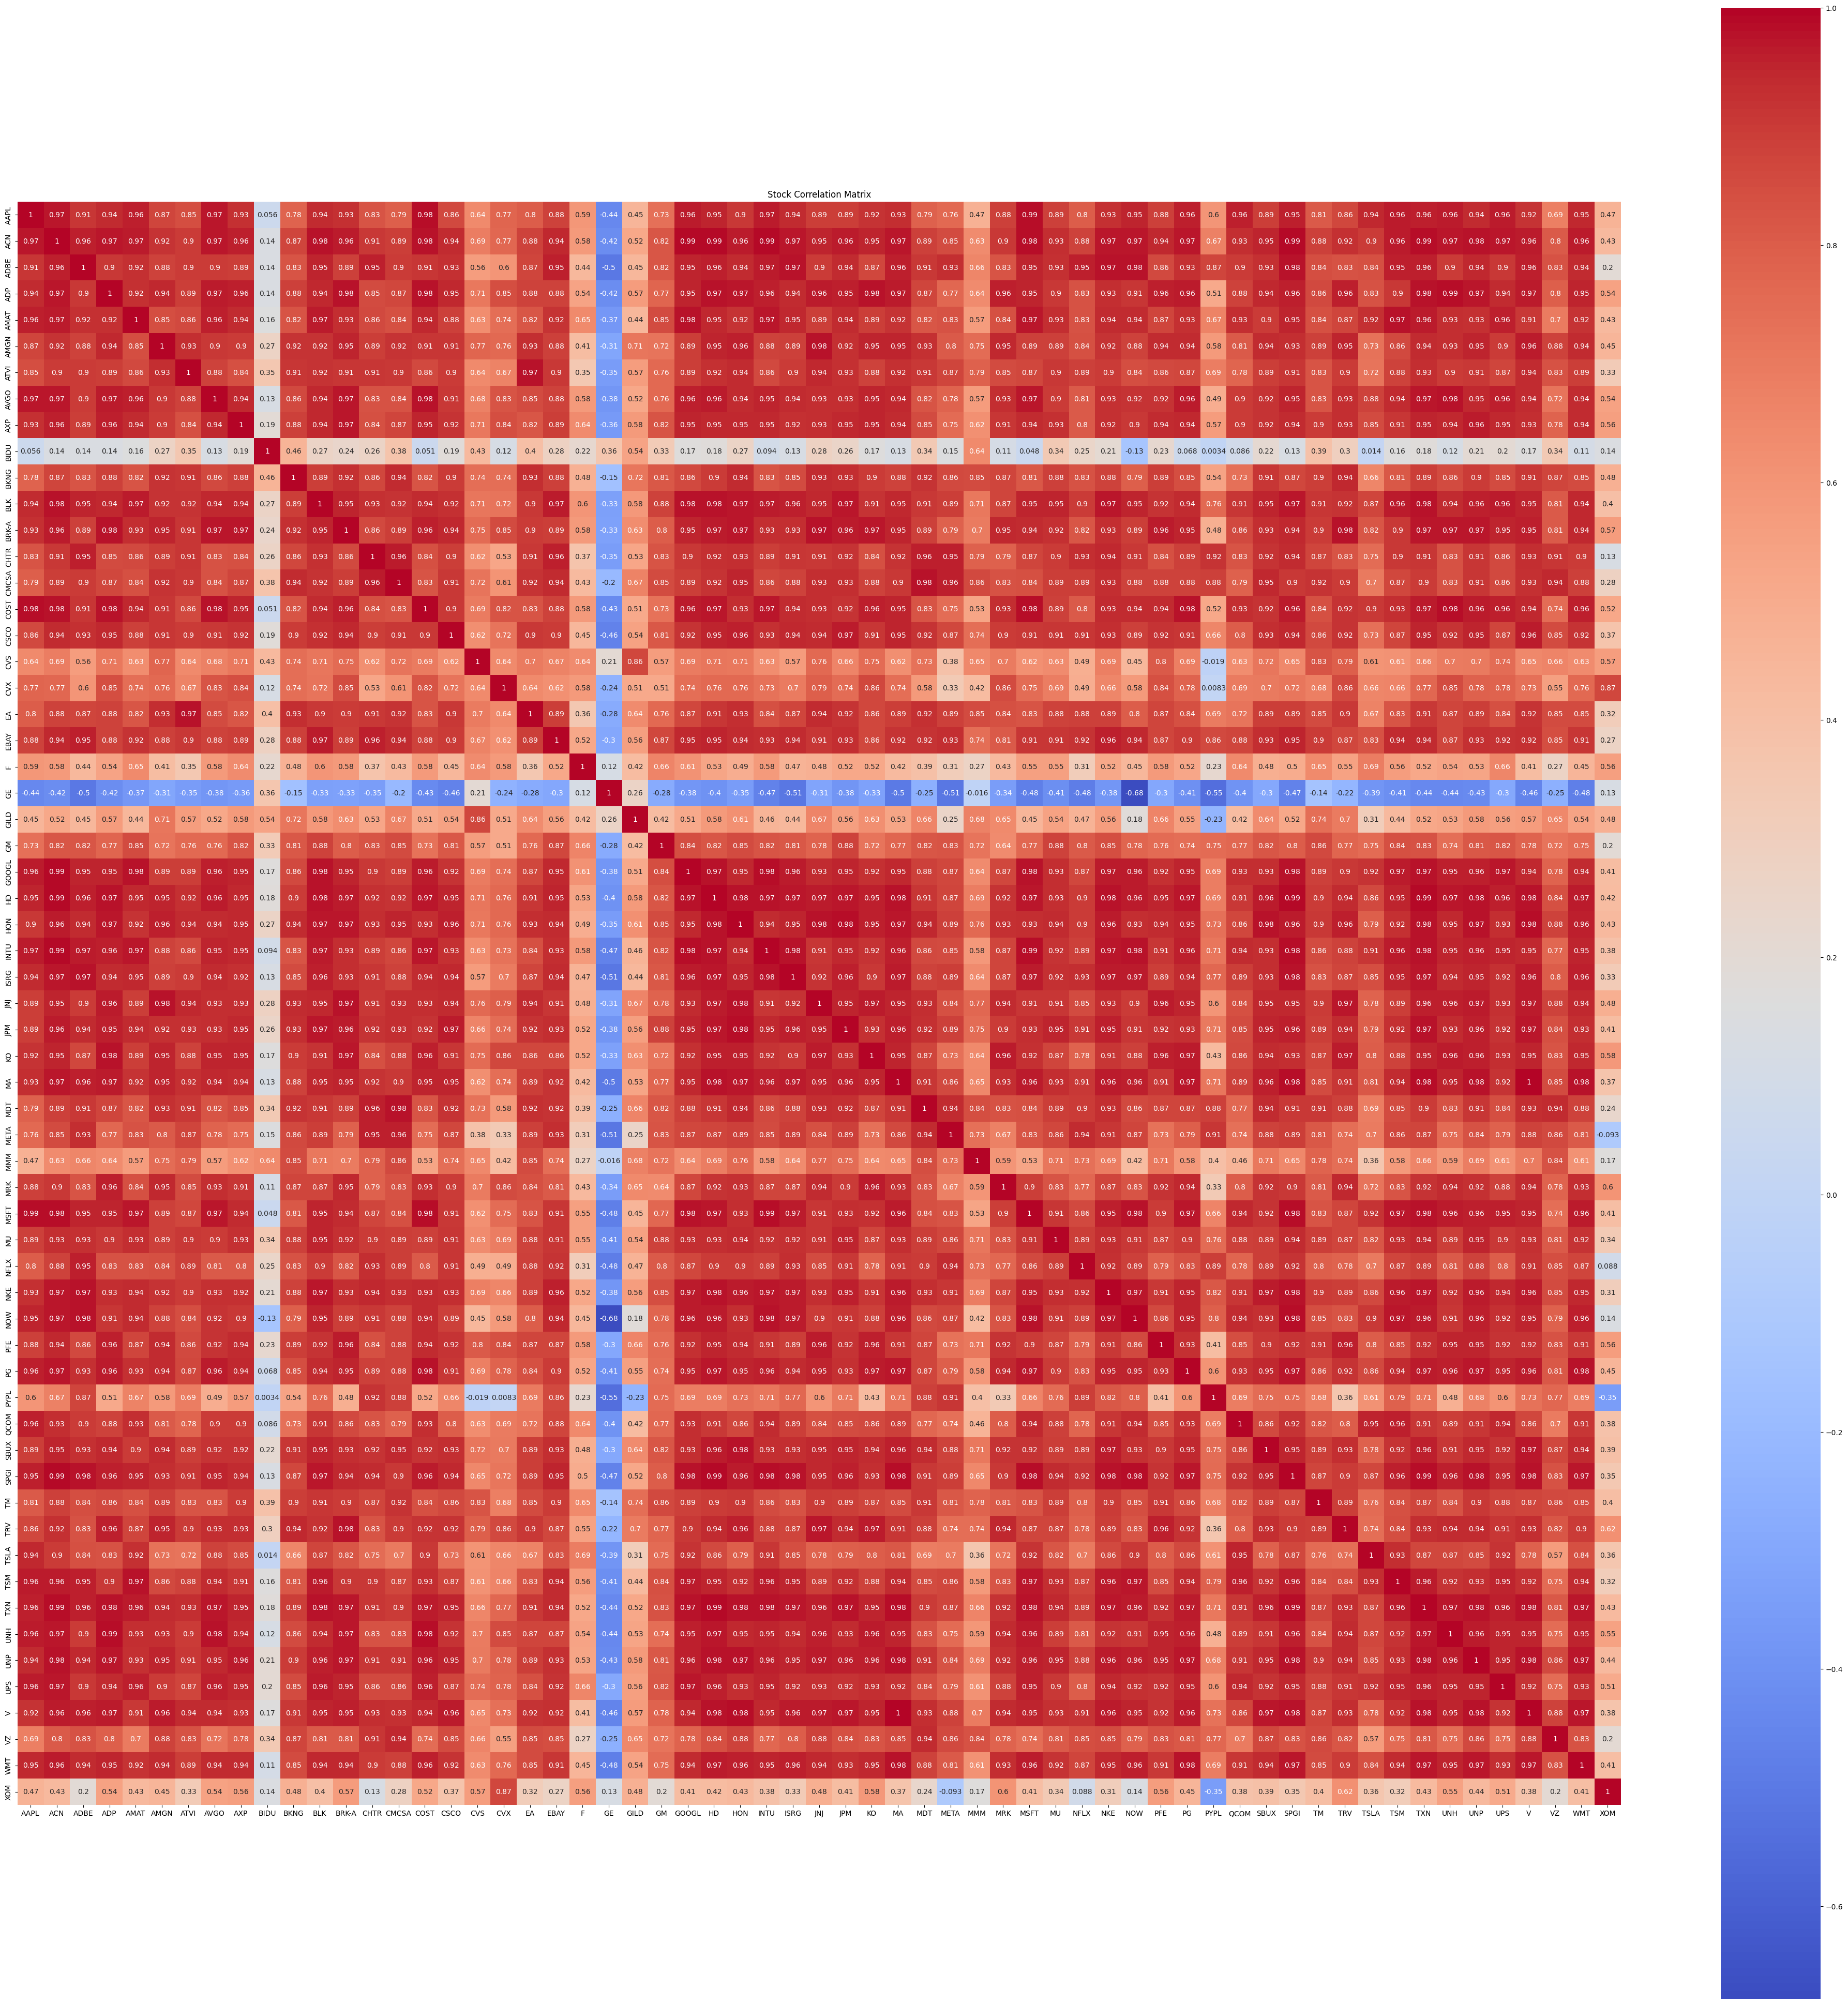

In [9]:
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Stock Correlation Matrix')
plt.show()

Overall correlation    

In [10]:
absolute_corr = correlation_matrix
column_overall_corr = absolute_corr.mean(axis = 0)


In [11]:
min_corr = column_overall_corr.min()
max_corr = column_overall_corr.max()
print('Min corr value is ',min_corr," ","and Max ",max_corr)

Min corr value is  -0.30174922347991046   and Max  0.8742578894989312


In [12]:
df_corr = pd.DataFrame(column_overall_corr, columns=['Correlation'])
df_corr.index.name = 'Stocks'
df_corr.reset_index(inplace=True)
# print(df_corr.to_string())

In [13]:
data = {
    "Stocks": [
        "AAPL", "ABNB", "ACN", "ADBE", "ADP", "AMAT", "AMD", "AMGN", "AMZN", "ATVI",
        "AVGO", "AXP", "BA", "BABA", "BAC", "BIDU", "BLK", "BRK-A", "BYND", "C",
        "CAT", "CHTR", "CMCSA", "COIN", "COST", "CRM", "CSCO", "CVS", "CVX", "DASH",
        "DOCU", "EA", "EBAY", "F", "GE", "GILD", "GM", "GOOGL", "GS", "HD", "HON",
        "HOOD", "IBM", "INTC", "INTU", "ISRG", "JNJ", "JPM", "KO", "LCID", "LYFT",
        "MA", "MDT", "META", "MMM", "MRK", "MS", "MSFT", "MU", "NFLX", "NIO",
        "NKE", "NOW", "NVDA", "ORCL", "PEP", "PFE", "PG", "PINS", "PM", "PYPL",
        "QCOM", "QS", "ROKU", "SBUX", "SCHW", "SHOP", "SNAP", "SNOW", "SPCE", "SPGI",
        "SPOT", "SQ", "T", "TEAM", "TGT", "TM", "TME", "TMO", "TRV", "TSLA",
        "TSM", "TWLO", "TXN", "UNH", "UNP", "UPS", "V", "VZ", "WBA", "WFC", "WMT",
        "XOM", "^DJI"
    ],
    "Correlation": [
        0.667903, 0.328243, 0.749654, 0.791798, 0.650582, 0.739285, 0.697283, 0.640048, 0.792487, 0.714120,
        0.657989, 0.698035, 0.483260, 0.336426, 0.739822, 0.260248, 0.786710, 0.664563, -0.045956, 0.635059,
        0.662392, 0.795998, 0.804209, 0.455464, 0.650626, 0.796208, 0.727452, 0.488281, 0.436450, 0.359582,
        0.468719, 0.739274, 0.798748, 0.421231, -0.233270, 0.359267, 0.715667, 0.759176, 0.700657, 0.750039,
        0.771335, 0.389164, 0.199817, 0.701520, 0.752036, 0.764695, 0.680099, 0.769719, 0.615735, 0.364648,
        0.097023, 0.725742, 0.795607, 0.735346, 0.617611, 0.569591, 0.697177, 0.716183, 0.772518, 0.765826,
        0.537274, 0.799570, 0.746903, 0.651125, 0.692753, 0.626614, 0.646104, 0.673419, 0.390697, 0.580379,
        0.606187, 0.709283, 0.166201, 0.506912, 0.764941, 0.691106, 0.652087, 0.525809, 0.310591, 0.312271,
        0.767695, 0.331025, 0.635398, 0.569018, 0.669335, 0.740649, 0.738786, -0.098713, 0.709821, 0.621893,
        0.659791, 0.775996, 0.549971, 0.756900, 0.626476, 0.739024, 0.714093, 0.739102, 0.723901, 0.191529,
        0.403554, 0.705381, 0.194791, 0.761206
    ]
}

df = pd.DataFrame(data)

Clustering Hierarchy Model

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_corr['Correlation'].values.reshape(-1, 1))

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df_corr['Cluster'] = labels


C:\Users\Renzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


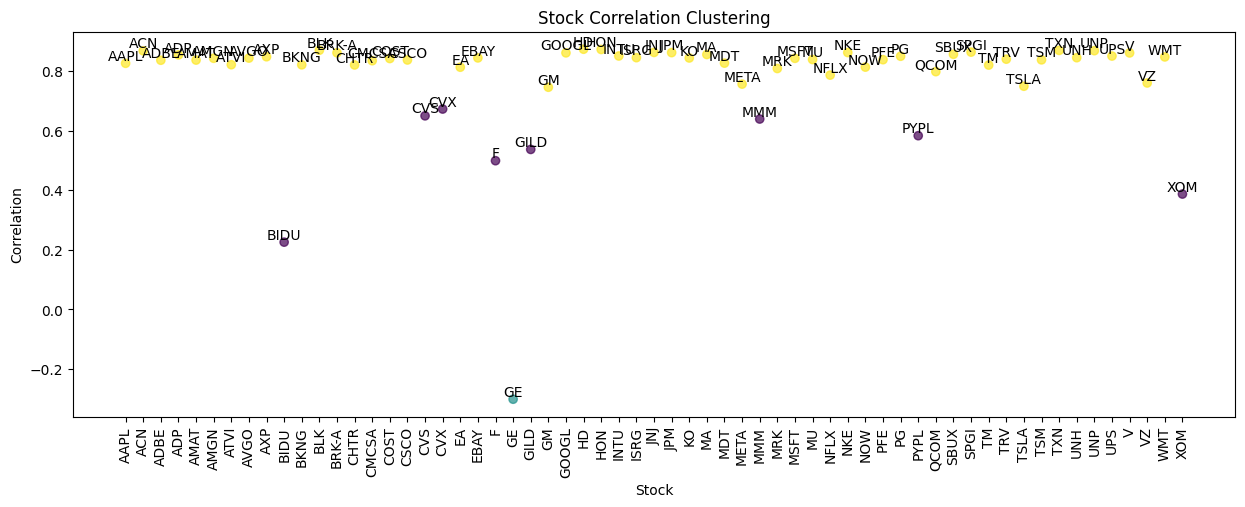

In [15]:
plt.figure(figsize=(15, 5))
plt.scatter(df_corr['Stocks'], df_corr['Correlation'], c=df_corr['Cluster'], alpha=0.7)
plt.title('Stock Correlation Clustering')
plt.xlabel('Stock')
plt.ylabel('Correlation')
plt.xticks(rotation=90)

# Add stock numbers to the plot
for i, stock in enumerate(df_corr['Stocks']):
    plt.text(i, df_corr['Correlation'].iloc[i], stock, ha='center', va='bottom')

plt.show()

Elbow Method

C:\Users\Renzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Renzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Renzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

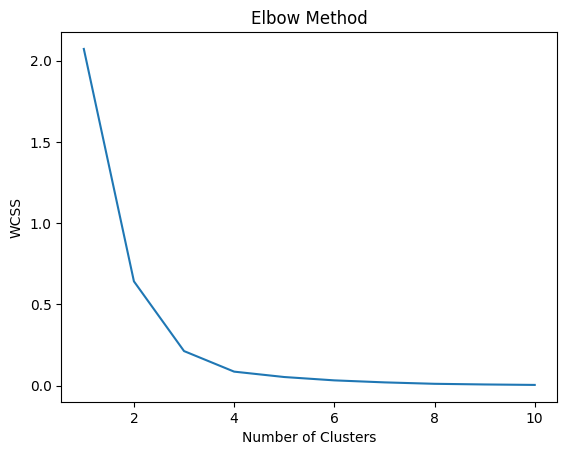

In [16]:
# Create a list to store the within-cluster sum of squares (WCSS)
wcss = []

# Fit K-means clustering for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_corr[['Correlation']])
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()